# Model Building

In [112]:
# =============================================================================
# IMPORTS (for modeling.ipynb)
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

print("Imports loaded ✓")

Imports loaded ✓


In [113]:
# Load featured data
df = pd.read_csv("data/processed/player_game_logs_featured.csv")

print(f"Loaded {len(df)} games")
print(f"Columns: {df.columns.tolist()}")

Loaded 1980 games
Columns: ['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'SEASON', 'HOME', 'REST_DAYS', 'B2B', 'PLAYER_NAME', 'ROLL_PTS_3', 'ROLL_PTS_5', 'ROLL_PTS_10', 'SEASON_AVG_PTS']


### Define Features and Target

In [114]:
# Define feature columns
feature_cols = [
    'HOME',
    'REST_DAYS',
    'B2B',
    'ROLL_PTS_3',
    'ROLL_PTS_5',
    'ROLL_PTS_10',
    'SEASON_AVG_PTS'
]

# Target column
target_col = 'PTS'

# Create X (features) and y (target)
X = df[feature_cols]
y = df[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures:\n{X.head()}")

Features shape: (1980, 7)
Target shape: (1980,)

Features:
   HOME  REST_DAYS  B2B  ROLL_PTS_3  ROLL_PTS_5  ROLL_PTS_10  SEASON_AVG_PTS
0     1        7.0    0   26.229787   26.229787    26.229787       26.229787
1     1        2.0    0   11.000000   11.000000    11.000000       11.000000
2     0        2.0    0   20.500000   20.500000    20.500000       20.500000
3     1        1.0    1   23.666667   23.666667    23.666667       23.666667
4     1        2.0    0   23.000000   20.000000    20.000000       20.000000


### Train/Test Split

In [115]:
# Sort by date to ensure chronological order
df = df.sort_values('GAME_DATE').reset_index(drop=True)

# Recreate X and y after sorting
X = df[feature_cols]
y = df[target_col]

# Use last 20% of games as test set (most recent games)
split_index = int(len(df) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(f"Training set: {len(X_train)} games")
print(f"Test set: {len(X_test)} games")
print(f"\nTraining period: {df['GAME_DATE'].iloc[0]} to {df['GAME_DATE'].iloc[split_index-1]}")
print(f"Test period: {df['GAME_DATE'].iloc[split_index]} to {df['GAME_DATE'].iloc[-1]}")

Training set: 1584 games
Test set: 396 games

Training period: 2022-10-18 to 2024-12-27
Test period: 2024-12-27 to 2025-04-13


### Baseline Model-- Linear Regression

In [116]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("=== LINEAR REGRESSION RESULTS ===")
print(f"MAE:  {mae_lr:.2f} points")
print(f"RMSE: {rmse_lr:.2f} points")
print(f"R²:   {r2_lr:.3f}")

=== LINEAR REGRESSION RESULTS ===
MAE:  6.70 points
RMSE: 8.53 points
R²:   0.035


### Check Feature Importance

In [117]:
# See which features matter most
coefficients = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("=== FEATURE IMPORTANCE (Linear Regression) ===")
print(coefficients)
print(f"\nIntercept: {lr_model.intercept_:.2f}")

=== FEATURE IMPORTANCE (Linear Regression) ===
          Feature  Coefficient
6  SEASON_AVG_PTS     0.425240
0            HOME     0.377877
5     ROLL_PTS_10     0.362020
2             B2B    -0.223524
1       REST_DAYS    -0.210276
3      ROLL_PTS_3    -0.064591
4      ROLL_PTS_5    -0.059746

Intercept: 10.03


## Other Models

### Ridge Regression (Linear with regularization)

In [118]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("=== RIDGE REGRESSION RESULTS ===")
print(f"MAE:  {mae_ridge:.2f} points")
print(f"RMSE: {rmse_ridge:.2f} points")
print(f"R²:   {r2_ridge:.3f}")

=== RIDGE REGRESSION RESULTS ===
MAE:  6.70 points
RMSE: 8.53 points
R²:   0.035


### Random Forest (Captures non-linear patterns)

In [119]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("=== RANDOM FOREST RESULTS ===")
print(f"MAE:  {mae_rf:.2f} points")
print(f"RMSE: {rmse_rf:.2f} points")
print(f"R²:   {r2_rf:.3f}")

=== RANDOM FOREST RESULTS ===
MAE:  6.77 points
RMSE: 8.64 points
R²:   0.010


### Gradient Boosting (Often best for tabular data)

In [120]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("=== GRADIENT BOOSTING RESULTS ===")
print(f"MAE:  {mae_gb:.2f} points")
print(f"RMSE: {rmse_gb:.2f} points")
print(f"R²:   {r2_gb:.3f}")

=== GRADIENT BOOSTING RESULTS ===
MAE:  6.98 points
RMSE: 8.85 points
R²:   -0.037


## Compare All Models

In [121]:
# Summary comparison
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mae_lr, mae_ridge, mae_rf, mae_gb],
    'RMSE': [rmse_lr, rmse_ridge, rmse_rf, rmse_gb],
    'R²': [r2_lr, r2_ridge, r2_rf, r2_gb]
}).sort_values('MAE')

print("=== MODEL COMPARISON ===")
print(results.to_string(index=False))

=== MODEL COMPARISON ===
            Model      MAE     RMSE        R²
            Ridge 6.698092 8.533997  0.034925
Linear Regression 6.698140 8.534037  0.034916
    Random Forest 6.770975 8.642091  0.010322
Gradient Boosting 6.980215 8.847888 -0.037374


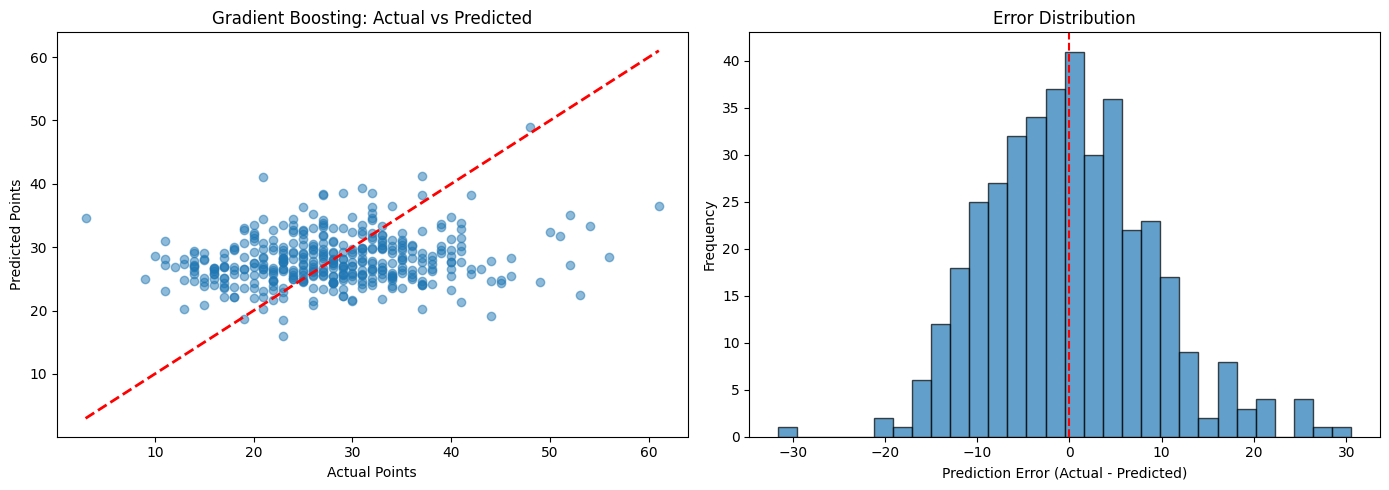


Mean Error: 0.01
Error Std: 8.86


In [122]:
# Plot actual vs predicted for best model
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(y_test, y_pred_gb, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Points')
axes[0].set_ylabel('Predicted Points')
axes[0].set_title('Gradient Boosting: Actual vs Predicted')

# Error distribution
errors = y_test - y_pred_gb
axes[1].hist(errors, bins=30, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='red', linestyle='--')
axes[1].set_xlabel('Prediction Error (Actual - Predicted)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Error Distribution')

plt.tight_layout()
plt.show()

print(f"\nMean Error: {errors.mean():.2f}")
print(f"Error Std: {errors.std():.2f}")

# Model needs improvement

In [123]:
# Reload and add player encoding
df = pd.read_csv("data/processed/player_game_logs_featured.csv")
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])
df = df.sort_values('GAME_DATE').reset_index(drop=True)

# Create player average points (their baseline)
player_avg = df.groupby('Player_ID')['PTS'].mean()
df['PLAYER_AVG_PTS'] = df['Player_ID'].map(player_avg)

# Updated feature list
feature_cols_v2 = [
    'HOME',
    'REST_DAYS',
    'B2B',
    'ROLL_PTS_3',
    'ROLL_PTS_5',
    'ROLL_PTS_10',
    'SEASON_AVG_PTS',
    'PLAYER_AVG_PTS'  # NEW
]

print("=== PLAYER AVERAGES ===")
print(df.groupby('Player_ID')['PLAYER_AVG_PTS'].first().sort_values(ascending=False))

=== PLAYER AVERAGES ===
Player_ID
203954     32.349593
1629029    32.081522
1628983    31.383562
203507     30.900498
1628369    27.927273
201142     27.418478
203999     26.816514
201939     26.610000
1630162    26.229787
2544       26.132653
Name: PLAYER_AVG_PTS, dtype: float64


In [124]:
# Prepare data
X = df[feature_cols_v2]
y = df['PTS']

# Time-based split
split_index = int(len(df) * 0.8)
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

# Train Ridge (best performer)
ridge_v2 = Ridge(alpha=1.0)
ridge_v2.fit(X_train, y_train)
y_pred_v2 = ridge_v2.predict(X_test)

# Evaluate
mae_v2 = mean_absolute_error(y_test, y_pred_v2)
rmse_v2 = np.sqrt(mean_squared_error(y_test, y_pred_v2))
r2_v2 = r2_score(y_test, y_pred_v2)

print("=== IMPROVED MODEL RESULTS ===")
print(f"MAE:  {mae_v2:.2f} points (was 6.70)")
print(f"RMSE: {rmse_v2:.2f} points (was 8.53)")
print(f"R²:   {r2_v2:.3f} (was 0.035)")

=== IMPROVED MODEL RESULTS ===
MAE:  6.63 points (was 6.70)
RMSE: 8.56 points (was 8.53)
R²:   0.029 (was 0.035)


In [125]:
# Which features matter now?
coefficients = pd.DataFrame({
    'Feature': feature_cols_v2,
    'Coefficient': ridge_v2.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("=== FEATURE IMPORTANCE ===")
print(coefficients)

=== FEATURE IMPORTANCE ===
          Feature  Coefficient
7  PLAYER_AVG_PTS     0.781392
0            HOME     0.357167
1       REST_DAYS    -0.253584
6  SEASON_AVG_PTS     0.228070
5     ROLL_PTS_10     0.178201
2             B2B    -0.147980
4      ROLL_PTS_5    -0.057943
3      ROLL_PTS_3    -0.051004


## Adding Opponent Defense Stats (12 and beyond)

In [126]:
# Extract opponent team from MATCHUP
# "BOS vs. MIA" → "MIA"
# "BOS @ MIA" → "MIA"

def extract_opponent(matchup):
    if ' vs. ' in matchup:
        return matchup.split(' vs. ')[1]
    elif ' @ ' in matchup:
        return matchup.split(' @ ')[1]
    return None

df['OPPONENT'] = df['MATCHUP'].apply(extract_opponent)

print("=== OPPONENTS ===")
print(df['OPPONENT'].value_counts().head(10))

=== OPPONENTS ===
OPPONENT
HOU    81
LAC    79
POR    78
SAS    75
SAC    75
DAL    75
UTA    74
MEM    74
NOP    73
DEN    73
Name: count, dtype: int64


In [127]:
from nba_api.stats.static import teams as nba_teams

# Get team name to abbreviation mapping
def get_team_abbreviation_map():
    """Create mapping from team name to abbreviation."""
    team_list = nba_teams.get_teams()
    return {team['full_name']: team['abbreviation'] for team in team_list}

team_abbrev_map = get_team_abbreviation_map()

print("=== TEAM MAPPING (sample) ===")
for name, abbr in list(team_abbrev_map.items())[:5]:
    print(f"  {name} → {abbr}")

=== TEAM MAPPING (sample) ===
  Atlanta Hawks → ATL
  Boston Celtics → BOS
  Cleveland Cavaliers → CLE
  New Orleans Pelicans → NOP
  Chicago Bulls → CHI


In [128]:
def get_team_defensive_proxy(season):
    """
    Create defensive strength proxy using PLUS_MINUS.
    
    Lower PLUS_MINUS = worse defense = easier to score against
    We invert it so higher = weaker opponent
    """
    try:
        stats = leaguedashteamstats.LeagueDashTeamStats(
            season=season,
            per_mode_detailed='PerGame'
        )
        df_stats = stats.get_data_frames()[0]
        
        # Add abbreviation using mapping
        df_stats['TEAM_ABBREVIATION'] = df_stats['TEAM_NAME'].map(team_abbrev_map)
        
        # Invert PLUS_MINUS: negative = bad defense = easier to score against
        df_stats['OPP_DEF_RATING'] = -df_stats['PLUS_MINUS']
        
        df_stats['SEASON'] = season
        
        return df_stats[['TEAM_ABBREVIATION', 'OPP_DEF_RATING', 'SEASON']]
        
    except Exception as e:
        print(f"{season} failed: {e}")
        return None

# Pull for all seasons
seasons = ['2022-23', '2023-24', '2024-25']
all_ratings = []

for season in seasons:
    print(f"Pulling {season}...")
    ratings = get_team_defensive_proxy(season)
    
    if ratings is not None:
        all_ratings.append(ratings)
        print(f"  Got {len(ratings)} teams")
    
    time.sleep(1)

# Combine
team_ratings = pd.concat(all_ratings, ignore_index=True)

print("\n=== TEAM DEFENSIVE RATINGS ===")
print(team_ratings.sort_values('OPP_DEF_RATING', ascending=False).head(10))

Pulling 2022-23...
  Got 30 teams
Pulling 2023-24...
  Got 30 teams
Pulling 2024-25...
  Got 30 teams

=== TEAM DEFENSIVE RATINGS ===
   TEAM_ABBREVIATION  OPP_DEF_RATING   SEASON
89               WAS            12.4  2024-25
33               CHA            10.2  2023-24
26               SAS            10.0  2022-23
78               NOP             9.4  2024-25
88               UTA             9.3  2024-25
59               WAS             9.3  2023-24
63               CHA             9.1  2024-25
38               DET             9.1  2023-24
54               POR             9.0  2023-24
8                DET             8.2  2022-23


In [129]:
# Create mapping: (team abbreviation, season) → defensive rating
def_rating_map = team_ratings.set_index(['TEAM_ABBREVIATION', 'SEASON'])['OPP_DEF_RATING'].to_dict()

# Apply to dataframe
df['OPP_DEF_RATING'] = df.apply(
    lambda row: def_rating_map.get((row['OPPONENT'], row['SEASON']), None),
    axis=1
)

# Check coverage
print("=== OPPONENT DEFENSIVE RATING ===")
print(f"Games with rating: {df['OPP_DEF_RATING'].notna().sum()}")
print(f"Games missing: {df['OPP_DEF_RATING'].isna().sum()}")
print(f"\nRating range: {df['OPP_DEF_RATING'].min():.1f} to {df['OPP_DEF_RATING'].max():.1f}")

=== OPPONENT DEFENSIVE RATING ===
Games with rating: 1901
Games missing: 79

Rating range: -12.9 to 12.4


In [130]:
# Fill missing with league average
league_avg_def = df['OPP_DEF_RATING'].mean()
df['OPP_DEF_RATING'] = df['OPP_DEF_RATING'].fillna(league_avg_def)

# Simplified feature set
feature_cols_v3 = [
    'HOME',
    'REST_DAYS',
    'B2B',
    'ROLL_PTS_5',
    'SEASON_AVG_PTS',
    'OPP_DEF_RATING'
]

# Prepare data
X = df[feature_cols_v3]
y = df['PTS']

# Time-based split
df = df.sort_values('GAME_DATE').reset_index(drop=True)
X = df[feature_cols_v3]
y = df['PTS']

split_index = int(len(df) * 0.8)
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(f"Training: {len(X_train)} games")
print(f"Test: {len(X_test)} games")
print(f"\nFeatures: {feature_cols_v3}")

Training: 1584 games
Test: 396 games

Features: ['HOME', 'REST_DAYS', 'B2B', 'ROLL_PTS_5', 'SEASON_AVG_PTS', 'OPP_DEF_RATING']


In [131]:
# Train multiple models
models = {
    'Ridge': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    })
    
    print(f"{name}: MAE={mae:.2f}, R²={r2:.3f}")

results_df = pd.DataFrame(results).sort_values('MAE')

print("\n=== MODEL COMPARISON (with Opponent Defense) ===")
print(results_df.to_string(index=False))

Ridge: MAE=6.62, R²=0.046
Random Forest: MAE=6.71, R²=0.018
Gradient Boosting: MAE=7.04, R²=-0.057

=== MODEL COMPARISON (with Opponent Defense) ===
            Model      MAE     RMSE        R²
            Ridge 6.621426 8.486931  0.045540
    Random Forest 6.707684 8.606901  0.018366
Gradient Boosting 7.038116 8.931875 -0.057162


In [132]:
# Get best model (lowest MAE)
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"=== FEATURE IMPORTANCE ({best_model_name}) ===")

if best_model_name == 'Ridge':
    importance = pd.DataFrame({
        'Feature': feature_cols_v3,
        'Coefficient': best_model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)
else:
    importance = pd.DataFrame({
        'Feature': feature_cols_v3,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

print(importance)

=== FEATURE IMPORTANCE (Ridge) ===
          Feature  Coefficient
4  SEASON_AVG_PTS     0.599864
0            HOME     0.408839
2             B2B    -0.302861
1       REST_DAYS    -0.198223
5  OPP_DEF_RATING     0.072729
3      ROLL_PTS_5     0.039765


### Saving the Model

In [133]:
import pickle

# Save the best model (Ridge)
best_model = Ridge(alpha=1.0)
best_model.fit(X_train, y_train)

# Save model
with open('src/models/ridge_pts_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save feature columns (important for predictions)
with open('src/models/feature_cols.pkl', 'wb') as f:
    pickle.dump(feature_cols_v3, f)

print("Model saved ✓")
print("Feature columns saved ✓")
print(f"\nFeatures: {feature_cols_v3}")

Model saved ✓
Feature columns saved ✓

Features: ['HOME', 'REST_DAYS', 'B2B', 'ROLL_PTS_5', 'SEASON_AVG_PTS', 'OPP_DEF_RATING']


In [134]:
def predict_points(
    player_name,
    opponent,
    home,
    rest_days,
    roll_pts_5,
    season_avg_pts,
    opp_def_rating=None
):
    """
    Predict points for a player in an upcoming game.
    
    Parameters:
    -----------
    player_name : str
        For display purposes
    opponent : str
        Team abbreviation (e.g., 'MIA')
    home : int
        1 = home, 0 = away
    rest_days : int
        Days since last game (cap at 7)
    roll_pts_5 : float
        Average of last 5 games
    season_avg_pts : float
        Season average
    opp_def_rating : float (optional)
        Opponent defensive rating (if None, uses league avg)
    
    Returns:
    --------
    Predicted points
    """
    # Load model
    with open('src/models/ridge_pts_model.pkl', 'rb') as f:
        model = pickle.load(f)
    
    # Handle opponent defensive rating
    if opp_def_rating is None:
        opp_def_rating = 0  # League average (neutral)
    
    # Back-to-back flag
    b2b = 1 if rest_days == 1 else 0
    
    # Cap rest days
    rest_days = min(rest_days, 7)
    
    # Create feature array
    features = pd.DataFrame([{
        'HOME': home,
        'REST_DAYS': rest_days,
        'B2B': b2b,
        'ROLL_PTS_5': roll_pts_5,
        'SEASON_AVG_PTS': season_avg_pts,
        'OPP_DEF_RATING': opp_def_rating
    }])
    
    # Predict
    prediction = model.predict(features)[0]
    
    print(f"\n{'='*40}")
    print(f"PREDICTION: {player_name}")
    print(f"{'='*40}")
    print(f"Opponent: {opponent} ({'Home' if home else 'Away'})")
    print(f"Rest days: {rest_days} ({'B2B' if b2b else 'Normal rest'})")
    print(f"Last 5 avg: {roll_pts_5:.1f}")
    print(f"Season avg: {season_avg_pts:.1f}")
    print(f"Opp defense: {opp_def_rating:+.1f}")
    print(f"{'='*40}")
    print(f"PREDICTED POINTS: {prediction:.1f}")
    print(f"{'='*40}")
    
    return prediction

print("Prediction function created ✓")

Prediction function created ✓


In [135]:
# Create a quick reference for opponent ratings
current_ratings = team_ratings[team_ratings['SEASON'] == '2024-25'].copy()
current_ratings = current_ratings.sort_values('OPP_DEF_RATING', ascending=False)

print("=== 2024-25 OPPONENT RATINGS ===")
print("(Higher = weaker defense = easier to score)")
print(current_ratings.to_string(index=False))

=== 2024-25 OPPONENT RATINGS ===
(Higher = weaker defense = easier to score)
TEAM_ABBREVIATION  OPP_DEF_RATING  SEASON
              WAS            12.4 2024-25
              NOP             9.4 2024-25
              UTA             9.3 2024-25
              CHA             9.1 2024-25
              BKN             7.1 2024-25
              PHI             6.2 2024-25
              TOR             4.3 2024-25
              POR             3.0 2024-25
              PHX             3.0 2024-25
              SAS             2.8 2024-25
              CHI             1.6 2024-25
              DAL             1.2 2024-25
              ATL             1.1 2024-25
              ORL             0.1 2024-25
              SAC            -0.5 2024-25
              MIA            -0.6 2024-25
              LAL            -1.2 2024-25
              DET            -1.9 2024-25
              IND            -2.2 2024-25
              MIL            -2.5 2024-25
              GSW            -3.3 2024-25

In [136]:
# Example: Predict Jayson Tatum tonight

predict_points(
    player_name="Jayson Tatum",
    opponent="MIA",
    home=1,                    # Home game
    rest_days=2,               # 2 days rest
    roll_pts_5=28.4,           # Last 5 game average
    season_avg_pts=27.8,       # Season average
    opp_def_rating=2.5         # Miami's rating (check from Step 21)
)


PREDICTION: Jayson Tatum
Opponent: MIA (Home)
Rest days: 2 (Normal rest)
Last 5 avg: 28.4
Season avg: 27.8
Opp defense: +2.5
PREDICTED POINTS: 28.7


np.float64(28.65558543284237)

In [137]:
def predict_slate(predictions_input):
    """
    Predict points for multiple players.
    
    Parameters:
    -----------
    predictions_input : list of dicts
        Each dict contains player info
    
    Returns:
    --------
    DataFrame with predictions
    """
    with open('src/models/ridge_pts_model.pkl', 'rb') as f:
        model = pickle.load(f)
    
    results = []
    
    for p in predictions_input:
        b2b = 1 if p['rest_days'] == 1 else 0
        rest_days = min(p['rest_days'], 7)
        opp_def = p.get('opp_def_rating', 0)
        
        features = pd.DataFrame([{
            'HOME': p['home'],
            'REST_DAYS': rest_days,
            'B2B': b2b,
            'ROLL_PTS_5': p['roll_pts_5'],
            'SEASON_AVG_PTS': p['season_avg_pts'],
            'OPP_DEF_RATING': opp_def
        }])
        
        pred = model.predict(features)[0]
        
        results.append({
            'Player': p['player_name'],
            'Opponent': p['opponent'],
            'Home': 'Yes' if p['home'] else 'No',
            'Predicted PTS': round(pred, 1)
        })
    
    return pd.DataFrame(results)


# Example slate
slate = [
    {
        'player_name': 'Jayson Tatum',
        'opponent': 'MIA',
        'home': 1,
        'rest_days': 2,
        'roll_pts_5': 28.4,
        'season_avg_pts': 27.8,
        'opp_def_rating': 2.5
    },
    {
        'player_name': 'Luka Dončić',
        'opponent': 'HOU',
        'home': 0,
        'rest_days': 1,
        'roll_pts_5': 32.1,
        'season_avg_pts': 33.2,
        'opp_def_rating': 1.2
    },
    {
        'player_name': 'Shai Gilgeous-Alexander',
        'opponent': 'POR',
        'home': 1,
        'rest_days': 3,
        'roll_pts_5': 31.5,
        'season_avg_pts': 31.8,
        'opp_def_rating': 5.8
    }
]

print("=== TONIGHT'S SLATE PREDICTIONS ===")
print(predict_slate(slate))

=== TONIGHT'S SLATE PREDICTIONS ===
                    Player Opponent Home  Predicted PTS
0             Jayson Tatum      MIA  Yes           28.7
1              Luka Dončić      HOU   No           31.4
2  Shai Gilgeous-Alexander      POR  Yes           31.2


In [ ]:
# Save team ratings for quick lookup
team_ratings.to_csv('data/external/team_defensive_ratings.csv', index=False)

# Save the cleaned featured dataset
df.to_csv('data/processed/player_game_logs_featured.csv', index=False)

print("All data saved ✓")
print("\nFiles:")
print("  - src/models/ridge_pts_model.pkl")
print("  - src/models/feature_cols.pkl")
print("  - data/external/team_defensive_ratings.csv")
print("  - data/processed/player_game_logs_featured.csv")